In [67]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [68]:
import sys
LOCAL_FAST_AI = '/Users/krishnakalyan3/Educational/FastAI/fastai/'
AWS_FAST_AI = '/home/ubuntu/fastai'
sys.path.append(AWS_FAST_AI)

In [69]:
from fastai.transforms import * 
from fastai.conv_learner import * 
from fastai.model import *
from fastai.dataset import * 
from fastai.sgdr import *
from fastai.plots import *

In [70]:
PATH = '/home/ubuntu/Plant/data/'

In [71]:
# Load Images

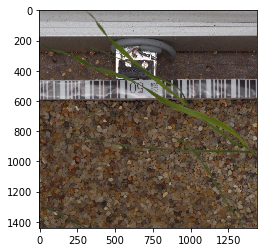

In [72]:
PATH_IMG = PATH + 'train/26103af9c.png'
img = plt.imread(PATH_IMG)
plt.imshow(img)

In [73]:
# Segmentations

In [74]:
def create_mask_for_plant(image):
    image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    sensitivity = 35
    lower_hsv = np.array([60 - sensitivity, 100, 50])
    upper_hsv = np.array([60 + sensitivity, 255, 255])

    mask = cv2.inRange(image_hsv, lower_hsv, upper_hsv)
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (11,11))
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
    
    return mask

def segment_plant(image):
    mask = create_mask_for_plant(image)
    output = cv2.bitwise_and(image, image, mask = mask)
    return output

In [75]:
image = cv2.imread(PATH_IMG, cv2.IMREAD_COLOR)
image = cv2.resize(image, (150, 150))
image = segment_plant(image)
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#image = cv2.resize(image, (45,45))

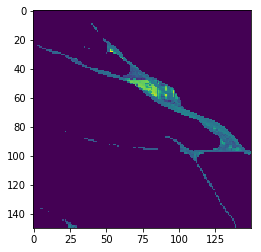

In [76]:
plt.imshow(image)

In [77]:
def cieluv(img, target):
    # adapted from https://www.compuphase.com/cmetric.htm
    img = img.astype('int')
    aR, aG, aB = img[:,:,0], img[:,:,1], img[:,:,2]
    bR, bG, bB = target
    rmean = ((aR + bR) / 2.).astype('int')
    r2 = np.square(aR - bR)
    g2 = np.square(aG - bG)
    b2 = np.square(aB - bB)
    
    # final sqrt removed for speed; please square your thresholds accordingly
    result = (((512+rmean)*r2)>>8) + 4*g2 + (((767-rmean)*b2)>>8)
    
    return result

In [78]:
def process_image(f, plot=True):
    img = plt.imread(f)
    img = np.round(img * 255).astype('ubyte')[:,:,:3]
    if plot:
        plt.figure(1)
        plt.subplot(141)
        plt.imshow(img)
        plt.title('Raw Image')
    img_filter = (
        (cieluv(img, (71, 86, 38)) > 1600)
        & (cieluv(img, (65,  79,  19)) > 1600)
        & (cieluv(img, (95,  106,  56)) > 1600)
        & (cieluv(img, (56,  63,  43)) > 500)
    )
    img[img_filter] = 0
    
    if plot:
        plt.subplot(142)
        plt.imshow(img)
        plt.title('CIELUV Color Thresholding')
    
    img = cv2.medianBlur(img, 9)
    
    if plot:
        plt.subplot(143)
        plt.imshow(img)
        plt.title('Median filter')
    
    img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    img = img.astype('uint8')
    
    if plot:
        plt.subplot(144)
        plt.imshow(img)
        plt.title('Black and White')
    return img

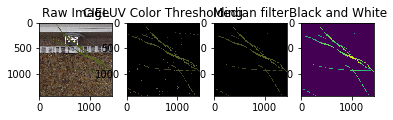

In [79]:
i = process_image(PATH_IMG)

In [80]:
def create_mask_for_plant(image):
    image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    sensitivity = 35
    lower_hsv = np.array([60 - sensitivity, 100, 50])
    upper_hsv = np.array([60 + sensitivity, 255, 255])

    mask = cv2.inRange(image_hsv, lower_hsv, upper_hsv)
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (11,11))
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
    
    return mask

def segment_plant(image):
    mask = create_mask_for_plant(image)
    output = cv2.bitwise_and(image, image, mask = mask)
    return output

def sharpen_image(image):
    image_blurred = cv2.GaussianBlur(image, (0, 0), 3)
    image_sharp = cv2.addWeighted(image, 1.5, image_blurred, -0.5, 0)
    return image_sharp

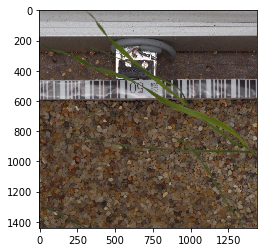

In [83]:
image = cv2.imread(PATH_IMG, cv2.IMREAD_COLOR)
image = cv2.cvtColor(image, cv2.COLOR_BGRA2RGB)
plt.imshow(image)

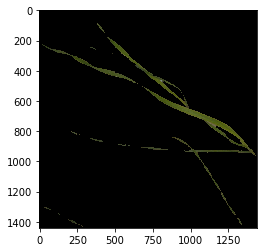

In [84]:
image_segmented = segment_plant(image)
plt.imshow(image_segmented)

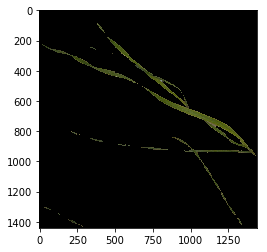

In [85]:
image_sharp = sharpen_image(image_segmented)
plt.imshow(image_sharp)

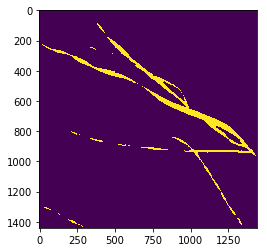

In [86]:
image_mask = create_mask_for_plant(image)
plt.imshow(image_mask)

In [87]:
cv2.imwrite('abc', image_mask)

error: /io/opencv/modules/imgcodecs/src/loadsave.cpp:604: error: (-2) could not find a writer for the specified extension in function imwrite_


In [89]:
from PIL import Image


In [91]:
im = Image.fromarray(image_mask)
im.save("your_file.jpeg")

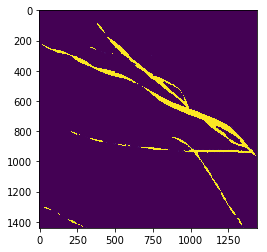

In [92]:
PATH_IMG = 'your_file.jpeg'
img = plt.imread(PATH_IMG)
plt.imshow(img)